In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import random
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv('../data/clean/dataset.csv')

In [3]:
df[df.isna().any(axis=1)]

,name,url,title,lemmes,funny
18008,la_depeche,https://www.ladepeche.fr/2024/10/04/de-tout-un...,"De tout, un peu",NaN,0


In [4]:
df = df.fillna('')

In [5]:
df[df.isna().any(axis=1)]

,name,url,title,lemmes,funny


In [6]:
df

,name,url,title,lemmes,funny
0,le_monde,https://www.lemonde.fr/disparitions/article/20...,"Simon Fieschi, grièvement blessé pendant l’att...",simon fieschi grievement blesser attentat cont...,0
1,le_monde,https://www.lemonde.fr/idees/article/2024/10/1...,« Il faut expliquer la différence entre les ef...,falloir expliquer difference effet concret imm...,0
2,le_monde,https://www.lemonde.fr/economie/article/2024/1...,Le périphérique a désormais son outil évaluate...,peripherique outil evaluateur kilometre heure,0
3,le_monde,https://www.lemonde.fr/economie/article/2024/1...,"En Occitanie, les agriculteurs mécontents mult...",occitanie agriculteur mecontent multiplier act...,0
4,le_monde,https://www.lemonde.fr/les-decodeurs/article/2...,Présidentielle américaine 2024 : comment Donal...,presidentielle americain donald trump instrume...,0
...,...,...,...,...,...
102080,ouest_france,https://www.ouest-france.fr/pays-de-la-loire/t...,Le défi Foyers à alimentation positive d’Erd...,defi foyers alimentation positif erdre gesvre ...,0
102081,ouest_france,https://www.ouest-france.fr/sport/football/red...,"Football. Le propriétaire du Red Star, 777 Pa...",football proprietaire red star partners failli...,0
102082,ouest_france,https://www.ouest-france.fr/normandie/lisieux-...,"Plus d’un an après les émeutes à Lisieux, l...",an apres emeute lisieux poste police municipal...,0
102083,ouest_france,https://www.ouest-france.fr/bretagne/finistere...,Le Sud-Finistère célèbre la culture urbaine...,sud finistere celebre culture urbain etat,0


In [7]:
print(len(df))
print(len(df[df['funny'] == 0]))
print(len(df[df['funny'] == 0]) / len(df))
print(len(df[df['funny'] == 1]))
print(len(df[df['funny'] == 1]) / len(df))

102085
86795
0.8502228535044326
15290
0.14977714649556742


In [8]:
df['name'].unique()

array(['le_monde', 'la_depeche', 'actu_orange', 'huffpost',
       'franceinfotv', 'europe1', 'rfi', 'demotivateur', 'le_parisien',
       'liberation', 'ouest_france'], dtype=object)

In [9]:
df.groupby('name').size().reset_index(name='count').sort_values(by='count', ascending=False)

,name,count
7,le_parisien,17996
9,ouest_france,16704
5,la_depeche,16440
3,franceinfotv,14142
4,huffpost,10307
6,le_monde,8565
10,rfi,7247
8,liberation,5999
1,demotivateur,2381
2,europe1,1704


In [10]:
for name in df['name'].unique():
    print("{:<15} {:>5}    {:>.5f}".format(name, len(df[df['name'] == name]), len(df[df['name'] == name])/len(df)))





le_monde         8565    0.08390
la_depeche      16440    0.16104
actu_orange       600    0.00588
huffpost        10307    0.10096
franceinfotv    14142    0.13853
europe1          1704    0.01669
rfi              7247    0.07099
demotivateur     2381    0.02332
le_parisien     17996    0.17628
liberation       5999    0.05876
ouest_france    16704    0.16363


In [11]:
for index, row in df.groupby('name').size().reset_index(name='count').sort_values(by='count', ascending=False).iterrows():
    print("{:<15} {:>5}    {:>.5f}".format(row['name'], row['count'], row['count']/len(df)))


le_parisien     17996    0.17628
ouest_france    16704    0.16363
la_depeche      16440    0.16104
franceinfotv    14142    0.13853
huffpost        10307    0.10096
le_monde         8565    0.08390
rfi              7247    0.07099
liberation       5999    0.05876
demotivateur     2381    0.02332
europe1          1704    0.01669
actu_orange       600    0.00588


In [12]:
df['lemmes'][:10]

0    simon fieschi grievement blesser attentat cont...
1    falloir expliquer difference effet concret imm...
2        peripherique outil evaluateur kilometre heure
3    occitanie agriculteur mecontent multiplier act...
4    presidentielle americain donald trump instrume...
5    generalisation videosurveillance algorithmique...
6    barcelone coupe america succes excus renover p...
7    italie tribunal invalide retention migrant env...
8    direct budget depute continuer reecrire texte ...
9    fanzinarium paris memoire vif passionne period...
Name: lemmes, dtype: object

In [13]:
' '.join(list(df['lemmes'][:10])).split()

['simon',
 'fieschi',
 'grievement',
 'blesser',
 'attentat',
 'contre',
 'charlie',
 'hebdo',
 'mourir',
 'falloir',
 'expliquer',
 'difference',
 'effet',
 'concret',
 'immigration',
 'ressentir',
 'citoyen',
 'peripherique',
 'outil',
 'evaluateur',
 'kilometre',
 'heure',
 'occitanie',
 'agriculteur',
 'mecontent',
 'multiplier',
 'action',
 'an',
 'dernier',
 'mouvement',
 'presidentielle',
 'americain',
 'donald',
 'trump',
 'instrumentalise',
 'theorie',
 'complotiste',
 'campagne',
 'campagne',
 'generalisation',
 'videosurveillance',
 'algorithmique',
 'peser',
 'risque',
 'majeur',
 'liberte',
 'barcelone',
 'coupe',
 'america',
 'succes',
 'excus',
 'renover',
 'port',
 'arnaqu',
 'italie',
 'tribunal',
 'invalide',
 'retention',
 'migrant',
 'envoyer',
 'albanie',
 'direct',
 'budget',
 'depute',
 'continuer',
 'reecrire',
 'texte',
 'commission',
 'fanzinarium',
 'paris',
 'memoire',
 'vif',
 'passionne',
 'periodique',
 'amateur']

In [14]:
Counter(' '.join(list(df['lemmes'][:10])).split()).most_common(5)

[('campagne', 2),
 ('simon', 1),
 ('fieschi', 1),
 ('grievement', 1),
 ('blesser', 1)]

In [15]:
df.iloc[53620]

name                                           franceinfotv
url       https://www.francetvinfo.fr/replay-jt/france-2...
title     Santé : les finances des Ehpad sont dans le rouge
lemmes                            sante finance ehpad rouge
funny                                                     0
Name: 53620, dtype: object

In [16]:
count_all = Counter(' '.join(list(df['lemmes'])).split()).most_common(50)
count_all

[('paris', 6885),
 ('jo', 5922),
 ('france', 4496),
 ('video', 4455),
 ('an', 4300),
 ('octobre', 2753),
 ('jeu', 2748),
 ('contre', 2500),
 ('nouveau', 2413),
 ('mort', 2160),
 ('apres', 2119),
 ('faire', 1908),
 ('etre', 1815),
 ('euro', 1802),
 ('guerre', 1791),
 ('grand', 1760),
 ('francais', 1735),
 ('monde', 1644),
 ('olympique', 1633),
 ('vouloir', 1561),
 ('homme', 1561),
 ('face', 1504),
 ('paralympique', 1493),
 ('femme', 1400),
 ('mettre', 1388),
 ('ministre', 1348),
 ('jour', 1294),
 ('enfant', 1277),
 ('football', 1277),
 ('gouvernement', 1270),
 ('jeune', 1225),
 ('vie', 1214),
 ('israel', 1191),
 ('etat', 1180),
 ('americain', 1174),
 ('medaille', 1155),
 ('prendre', 1154),
 ('samedi', 1139),
 ('heure', 1134),
 ('barnier', 1122),
 ('bleu', 1105),
 ('septembre', 1082),
 ('michel', 1077),
 ('temps', 1042),
 ('petit', 1038),
 ('prix', 1028),
 ('photos', 1020),
 ('pays', 1016),
 ('ligue', 993),
 ('equipe', 980)]

In [17]:
{ k: v  for k, v in count_all}

{'paris': 6885,
 'jo': 5922,
 'france': 4496,
 'video': 4455,
 'an': 4300,
 'octobre': 2753,
 'jeu': 2748,
 'contre': 2500,
 'nouveau': 2413,
 'mort': 2160,
 'apres': 2119,
 'faire': 1908,
 'etre': 1815,
 'euro': 1802,
 'guerre': 1791,
 'grand': 1760,
 'francais': 1735,
 'monde': 1644,
 'olympique': 1633,
 'vouloir': 1561,
 'homme': 1561,
 'face': 1504,
 'paralympique': 1493,
 'femme': 1400,
 'mettre': 1388,
 'ministre': 1348,
 'jour': 1294,
 'enfant': 1277,
 'football': 1277,
 'gouvernement': 1270,
 'jeune': 1225,
 'vie': 1214,
 'israel': 1191,
 'etat': 1180,
 'americain': 1174,
 'medaille': 1155,
 'prendre': 1154,
 'samedi': 1139,
 'heure': 1134,
 'barnier': 1122,
 'bleu': 1105,
 'septembre': 1082,
 'michel': 1077,
 'temps': 1042,
 'petit': 1038,
 'prix': 1028,
 'photos': 1020,
 'pays': 1016,
 'ligue': 993,
 'equipe': 980}

In [18]:
count_neg = Counter(' '.join(list(df[df['funny'] == 0]['lemmes'])).split()).most_common(50)
count_neg

[('paris', 6684),
 ('jo', 5865),
 ('france', 4304),
 ('an', 3426),
 ('octobre', 2750),
 ('jeu', 2612),
 ('contre', 2351),
 ('nouveau', 2227),
 ('mort', 2056),
 ('apres', 1848),
 ('video', 1813),
 ('guerre', 1751),
 ('francais', 1641),
 ('olympique', 1587),
 ('etre', 1541),
 ('grand', 1525),
 ('paralympique', 1492),
 ('faire', 1460),
 ('face', 1407),
 ('vouloir', 1372),
 ('ministre', 1296),
 ('euro', 1285),
 ('gouvernement', 1257),
 ('football', 1230),
 ('mettre', 1197),
 ('homme', 1183),
 ('israel', 1182),
 ('medaille', 1145),
 ('samedi', 1132),
 ('barnier', 1120),
 ('jour', 1092),
 ('septembre', 1075),
 ('jeune', 1069),
 ('bleu', 1068),
 ('vie', 1064),
 ('michel', 1061),
 ('femme', 1054),
 ('etat', 1047),
 ('monde', 1045),
 ('heure', 1011),
 ('americain', 984),
 ('ligue', 979),
 ('temps', 963),
 ('prix', 957),
 ('enfant', 955),
 ('pays', 938),
 ('equipe', 926),
 ('environ', 889),
 ('vendredi', 888),
 ('fete', 878)]

In [19]:
count_pos = Counter(' '.join(list(df[df['funny'] == 1]['lemmes'])).split()).most_common(50)
count_pos

[('video', 2642),
 ('photos', 1020),
 ('an', 874),
 ('monde', 599),
 ('euro', 517),
 ('photo', 499),
 ('faire', 448),
 ('homme', 378),
 ('femme', 346),
 ('plein', 342),
 ('chien', 342),
 ('petit', 338),
 ('enfant', 322),
 ('prendre', 281),
 ('etre', 274),
 ('mariage', 271),
 ('apres', 271),
 ('avion', 262),
 ('internaute', 261),
 ('bebe', 256),
 ('chat', 244),
 ('retrouver', 243),
 ('million', 243),
 ('devenir', 242),
 ('maison', 240),
 ('voiture', 237),
 ('grand', 235),
 ('decouvrir', 218),
 ('fille', 216),
 ('grace', 213),
 ('jour', 202),
 ('record', 202),
 ('paris', 201),
 ('france', 192),
 ('mettre', 191),
 ('americain', 190),
 ('ete', 190),
 ('vouloir', 189),
 ('nouveau', 186),
 ('star', 184),
 ('couple', 180),
 ('vendre', 180),
 ('tour', 179),
 ('noel', 178),
 ('bien', 177),
 ('cause', 175),
 ('trump', 174),
 ('voir', 171),
 ('passer', 169),
 ('dollar', 168)]

In [20]:
def make_wordcloud(count):
    cloud = WordCloud(background_color = 'white').generate_from_frequencies({ k: v for (k, v) in count})
    plt.imshow(cloud.recolor(color_func=lambda *args, **kwargs: "rgb(0, 100, {})".format(random.randint(100, 255))))
    plt.axis("off")
    plt.show();

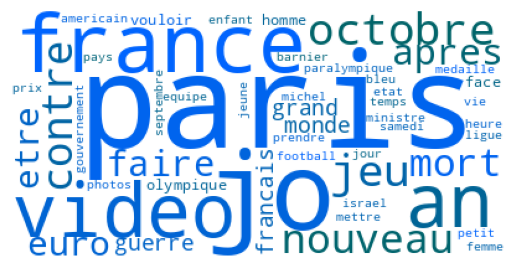

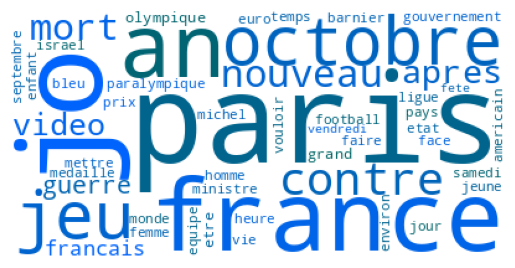

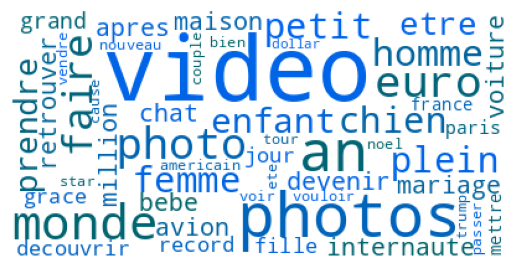

In [21]:
make_wordcloud(count_all)
make_wordcloud(count_neg)
make_wordcloud(count_pos)

In [22]:
' '.join(list(df[df['funny'] == 0]['lemmes'])).split().count('photos')

0

In [23]:
' '.join(list(df[df['funny'] == 0]['lemmes'])).split().count('photo')

195

In [24]:
freq_all = list(map(lambda x: (x[0], x[1] / len(df)), count_all))
freq_all

[('paris', 0.06744379683597003),
 ('jo', 0.05801048146152716),
 ('france', 0.0440417299309399),
 ('video', 0.043640103835039426),
 ('an', 0.0421217612773669),
 ('octobre', 0.026967722975951413),
 ('jeu', 0.02691874418376843),
 ('contre', 0.024489396091492383),
 ('nouveau', 0.023637165107508448),
 ('mort', 0.02115883822304942),
 ('apres', 0.020757212127148945),
 ('faire', 0.018690307097026987),
 ('etre', 0.01777930156242347),
 ('euro', 0.01765195670274771),
 ('guerre', 0.017544203359945144),
 ('grand', 0.01724053484841064),
 ('francais', 0.016995640887495715),
 ('monde', 0.01610422686976539),
 ('olympique', 0.015996473526962825),
 ('vouloir', 0.015291178919527845),
 ('homme', 0.015291178919527845),
 ('face', 0.014732820688641818),
 ('paralympique', 0.014625067345839252),
 ('femme', 0.013714061811235734),
 ('mettre', 0.013596512709996572),
 ('ministre', 0.013204682372532693),
 ('jour', 0.012675711416956458),
 ('enfant', 0.01250918352353431),
 ('football', 0.01250918352353431),
 ('gouvern

In [25]:
# Function to calculate lemma frequencies
def calculate_lemma_frequencies(df):
    # Separate positive and negative classes
    positive_data = df[df['funny'] == 1]['lemmes']
    negative_data = df[df['funny'] == 0]['lemmes']
    
    # Calculate overall frequency
    all_lemmas = ' '.join(df['lemmes']).split()
    count_all = Counter(all_lemmas)
    words = list(count_all.keys())
    
    # Calculate frequency in positive and negative classes
    positive_lemmas = ' '.join(positive_data).split()
    negative_lemmas = ' '.join(negative_data).split()
    count_pos = Counter(positive_lemmas)
    count_neg = Counter(negative_lemmas)

    total_count = len(df)
    total_pos = len(positive_data)
    total_neg = len(negative_data)
    
    comparison_data = []

    for lemma in words:
        overall = count_all[lemma]
        pos = count_pos[lemma]
        neg = count_neg[lemma]

        overall_freq = overall / total_count
        pos_freq = pos / total_pos
        neg_freq = neg / total_neg

        odds_ratio = (pos * total_neg) / (neg * total_pos) if neg != 0 and pos != 0 else None

        contingency_table = [
            [count_pos[lemma], total_pos - count_pos[lemma]],
            [count_neg[lemma], total_neg - count_neg[lemma]]
        ]
        chi2, p, _, _ = chi2_contingency(contingency_table)
        
        # Create a DataFrame to show frequencies
        comparison_data.append({
            'Lemma': lemma,
            'Overall_Frequency': overall_freq,
            'Negative_Frequency': neg_freq,
            'Positive_Frequency': pos_freq,
            'prop_diff_negative': neg_freq - overall_freq,
            'prop_diff_positive': pos_freq - overall_freq,
            'odds_ratio': odds_ratio,
            'p': p,
        })

    lemma_freq_df = pd.DataFrame(comparison_data)
    
    return lemma_freq_df

# Calculate and display lemma frequencies
lemma_frequencies = calculate_lemma_frequencies(df)
lemma_frequencies[:50]


,Lemma,Overall_Frequency,Negative_Frequency,Positive_Frequency,prop_diff_negative,prop_diff_positive,odds_ratio,p
0,simon,0.000754,0.000841,0.000262,0.000087,-0.000493,0.311046,2.465425e-02
1,fieschi,0.000059,0.000069,0.000000,0.000010,-0.000059,NaN,6.483228e-01
2,grievement,0.000558,0.000657,0.000000,0.000098,-0.000558,NaN,2.844690e-03
3,blesser,0.001146,0.001313,0.000196,0.000167,-0.000950,0.149384,2.776909e-04
4,attentat,0.001783,0.001982,0.000654,0.000199,-0.001129,0.330034,4.933284e-04
5,contre,0.024489,0.027087,0.009745,0.002597,-0.014744,0.359767,2.594672e-37
6,charlie,0.000490,0.000449,0.000719,-0.000040,0.000230,1.601088,2.326294e-01
7,hebdo,0.000353,0.000403,0.000065,0.000051,-0.000287,0.162188,6.905608e-02
8,mourir,0.005731,0.005968,0.004382,0.000238,-0.001349,0.734230,1.939944e-02
9,falloir,0.007817,0.008837,0.002027,0.001020,-0.005790,0.229432,1.849910e-18


In [26]:
lemma_frequencies.sort_values(by='Overall_Frequency', ascending=False).reset_index(drop=True)[:50]

,Lemma,Overall_Frequency,Negative_Frequency,Positive_Frequency,prop_diff_negative,prop_diff_positive,odds_ratio,p
0,paris,0.067444,0.077009,0.013146,0.009565,-0.054298,0.170705,4.030413e-185
1,jo,0.058010,0.067573,0.003728,0.009563,-0.054283,0.055169,1.235369e-212
2,france,0.044042,0.049588,0.012557,0.005546,-0.031485,0.253231,6.850526e-94
3,video,0.043640,0.020888,0.172793,-0.022752,0.129153,8.272223,0.000000e+00
4,an,0.042122,0.039472,0.057162,-0.002649,0.015040,1.448142,1.257457e-23
5,octobre,0.026968,0.031684,0.000196,0.004716,-0.026772,0.006193,1.431915e-108
6,jeu,0.026919,0.030094,0.008895,0.003175,-0.018024,0.295565,2.954698e-50
7,contre,0.024489,0.027087,0.009745,0.002597,-0.014744,0.359767,2.594672e-37
8,nouveau,0.023637,0.025658,0.012165,0.002021,-0.011472,0.474111,5.622775e-24
9,mort,0.021159,0.023688,0.006802,0.002529,-0.014357,0.287142,1.220377e-40


In [27]:
lemma_frequencies.sort_values(by='Negative_Frequency', ascending=False).reset_index(drop=True)[:50]

,Lemma,Overall_Frequency,Negative_Frequency,Positive_Frequency,prop_diff_negative,prop_diff_positive,odds_ratio,p
0,paris,0.067444,0.077009,0.013146,0.009565,-0.054298,0.170705,4.030413e-185
1,jo,0.058010,0.067573,0.003728,0.009563,-0.054283,0.055169,1.235369e-212
2,france,0.044042,0.049588,0.012557,0.005546,-0.031485,0.253231,6.850526e-94
3,an,0.042122,0.039472,0.057162,-0.002649,0.015040,1.448142,1.257457e-23
4,octobre,0.026968,0.031684,0.000196,0.004716,-0.026772,0.006193,1.431915e-108
5,jeu,0.026919,0.030094,0.008895,0.003175,-0.018024,0.295565,2.954698e-50
6,contre,0.024489,0.027087,0.009745,0.002597,-0.014744,0.359767,2.594672e-37
7,nouveau,0.023637,0.025658,0.012165,0.002021,-0.011472,0.474111,5.622775e-24
8,mort,0.021159,0.023688,0.006802,0.002529,-0.014357,0.287142,1.220377e-40
9,apres,0.020757,0.021292,0.017724,0.000534,-0.003033,0.832443,4.768120e-03


In [28]:
lemma_frequencies.sort_values(by='Positive_Frequency', ascending=False).reset_index(drop=True)[:50]

,Lemma,Overall_Frequency,Negative_Frequency,Positive_Frequency,prop_diff_negative,prop_diff_positive,odds_ratio,p
0,video,0.043640,0.020888,0.172793,-0.022752,0.129153,8.272223,0.000000e+00
1,photos,0.009992,0.000000,0.066710,-0.009992,0.056719,NaN,0.000000e+00
2,an,0.042122,0.039472,0.057162,-0.002649,0.015040,1.448142,1.257457e-23
3,monde,0.016104,0.012040,0.039176,-0.004064,0.023072,3.253852,4.934936e-133
4,euro,0.017652,0.014805,0.033813,-0.002847,0.016161,2.283887,1.273783e-60
5,photo,0.006798,0.002247,0.032636,-0.004552,0.025837,14.526238,0.000000e+00
6,faire,0.018690,0.016821,0.029300,-0.001869,0.010610,1.741857,1.142053e-25
7,homme,0.015291,0.013630,0.024722,-0.001661,0.009431,1.813820,9.537408e-25
8,femme,0.013714,0.012144,0.022629,-0.001571,0.008915,1.863471,1.285901e-24
9,plein,0.009365,0.007074,0.022368,-0.002291,0.013003,3.161877,6.791040e-73


In [29]:
lemma_frequencies.sort_values(by='prop_diff_negative', ascending=False).reset_index(drop=True)[:50]

,Lemma,Overall_Frequency,Negative_Frequency,Positive_Frequency,prop_diff_negative,prop_diff_positive,odds_ratio,p
0,paris,0.067444,0.077009,0.013146,0.009565,-0.054298,0.170705,4.030413e-185
1,jo,0.058010,0.067573,0.003728,0.009563,-0.054283,0.055169,1.235369e-212
2,france,0.044042,0.049588,0.012557,0.005546,-0.031485,0.253231,6.850526e-94
3,octobre,0.026968,0.031684,0.000196,0.004716,-0.026772,0.006193,1.431915e-108
4,jeu,0.026919,0.030094,0.008895,0.003175,-0.018024,0.295565,2.954698e-50
5,guerre,0.017544,0.020174,0.002616,0.002630,-0.014928,0.129676,2.820304e-52
6,contre,0.024489,0.027087,0.009745,0.002597,-0.014744,0.359767,2.594672e-37
7,paralympique,0.014625,0.017190,0.000065,0.002565,-0.014560,0.003805,3.201898e-59
8,mort,0.021159,0.023688,0.006802,0.002529,-0.014357,0.287142,1.220377e-40
9,olympique,0.015996,0.018284,0.003009,0.002288,-0.012988,0.164539,1.316001e-43


In [30]:
lemma_frequencies.sort_values(by='prop_diff_positive', ascending=False).reset_index(drop=True)[:50]

,Lemma,Overall_Frequency,Negative_Frequency,Positive_Frequency,prop_diff_negative,prop_diff_positive,odds_ratio,p
0,video,0.043640,0.020888,0.172793,-0.022752,0.129153,8.272223,0.000000e+00
1,photos,0.009992,0.000000,0.066710,-0.009992,0.056719,NaN,0.000000e+00
2,photo,0.006798,0.002247,0.032636,-0.004552,0.025837,14.526238,0.000000e+00
3,monde,0.016104,0.012040,0.039176,-0.004064,0.023072,3.253852,4.934936e-133
4,chien,0.005535,0.002569,0.022368,-0.002965,0.016833,8.705796,1.457050e-202
5,euro,0.017652,0.014805,0.033813,-0.002847,0.016161,2.283887,1.273783e-60
6,an,0.042122,0.039472,0.057162,-0.002649,0.015040,1.448142,1.257457e-23
7,internaute,0.002939,0.000449,0.017070,-0.002489,0.014131,37.989460,2.813992e-267
8,mariage,0.003654,0.001175,0.017724,-0.002479,0.014070,15.081910,1.081232e-213
9,bebe,0.003438,0.001095,0.016743,-0.002344,0.013305,15.296905,4.691196e-203


In [31]:
lemma_frequencies.sort_values(by='odds_ratio', ascending=True).reset_index(drop=True)[:50]

,Lemma,Overall_Frequency,Negative_Frequency,Positive_Frequency,prop_diff_negative,prop_diff_positive,odds_ratio,p
0,paralympique,0.014625,0.017190,0.000065,0.002565,-0.014560,0.003805,3.201898e-59
1,octobre,0.026968,0.031684,0.000196,0.004716,-0.026772,0.006193,1.431915e-108
2,budget,0.007523,0.008837,0.000065,0.001314,-0.007458,0.007401,1.006985e-30
3,liban,0.007317,0.008595,0.000065,0.001278,-0.007252,0.007609,6.671587e-30
4,barnier,0.010991,0.012904,0.000131,0.001913,-0.010860,0.010137,4.370003e-44
5,aout,0.008238,0.009666,0.000131,0.001428,-0.008107,0.013532,4.541804e-33
6,hamas,0.004055,0.004758,0.000065,0.000703,-0.003990,0.013745,6.806842e-17
7,orient,0.007308,0.008572,0.000131,0.001264,-0.007177,0.015260,2.358188e-29
8,handball,0.003350,0.003929,0.000065,0.000579,-0.003285,0.016647,4.444311e-14
9,vigilance,0.003213,0.003767,0.000065,0.000554,-0.003148,0.017360,1.569070e-13


In [32]:
lemma_frequencies.sort_values(by='odds_ratio', ascending=False).reset_index(drop=True)[:50]

,Lemma,Overall_Frequency,Negative_Frequency,Positive_Frequency,prop_diff_negative,prop_diff_positive,odds_ratio,p
0,loterie,0.000402,0.000012,0.002616,-0.000390,0.002214,227.063440,2.715712e-48
1,adorable,0.000392,0.000012,0.002551,-0.000380,0.002159,221.386854,4.687415e-47
2,alligator,0.000255,0.000012,0.001635,-0.000243,0.001380,141.914650,9.778366e-30
3,incruster,0.000235,0.000012,0.001504,-0.000224,0.001269,130.561478,2.911489e-27
4,effigie,0.000206,0.000012,0.001308,-0.000194,0.001102,113.531720,1.493129e-23
5,photoshop,0.000206,0.000012,0.001308,-0.000194,0.001102,113.531720,1.493129e-23
6,ebay,0.000196,0.000012,0.001243,-0.000184,0.001047,107.855134,2.572860e-22
7,perfection,0.000186,0.000012,0.001177,-0.000175,0.000991,102.178548,4.430810e-21
8,confinement,0.000362,0.000023,0.002289,-0.000339,0.001927,99.340255,1.297168e-40
9,duplex,0.000176,0.000012,0.001112,-0.000165,0.000936,96.501962,7.624829e-20


In [33]:
lemma_frequencies.sort_values(by='p', ascending=False).reset_index(drop=True)[:50]

,Lemma,Overall_Frequency,Negative_Frequency,Positive_Frequency,prop_diff_negative,prop_diff_positive,odds_ratio,p
0,doc,0.000049,0.000046,0.000065,-0.000003,0.000016,1.419147,1.0
1,fabcaro,0.000010,0.000012,0.000000,0.000002,-0.000010,NaN,1.0
2,paca,0.000010,0.000012,0.000000,0.000002,-0.000010,NaN,1.0
3,paratir,0.000010,0.000012,0.000000,0.000002,-0.000010,NaN,1.0
4,zaz,0.000020,0.000023,0.000000,0.000003,-0.000020,NaN,1.0
5,jean-xavier,0.000010,0.000012,0.000000,0.000002,-0.000010,NaN,1.0
6,lestrade,0.000010,0.000012,0.000000,0.000002,-0.000010,NaN,1.0
7,rallumee,0.000020,0.000023,0.000000,0.000003,-0.000020,NaN,1.0
8,delvau,0.000010,0.000012,0.000000,0.000002,-0.000010,NaN,1.0
9,specificite,0.000029,0.000035,0.000000,0.000005,-0.000029,NaN,1.0


In [34]:
lemma_frequencies.sort_values(by='p', ascending=True).reset_index(drop=True)[:50]

,Lemma,Overall_Frequency,Negative_Frequency,Positive_Frequency,prop_diff_negative,prop_diff_positive,odds_ratio,p
0,photos,0.009992,0.000000,0.066710,-0.009992,0.056719,NaN,0.000000e+00
1,video,0.043640,0.020888,0.172793,-0.022752,0.129153,8.272223,0.000000e+00
2,photo,0.006798,0.002247,0.032636,-0.004552,0.025837,14.526238,0.000000e+00
3,internaute,0.002939,0.000449,0.017070,-0.002489,0.014131,37.989460,2.813992e-267
4,mariage,0.003654,0.001175,0.017724,-0.002479,0.014070,15.081910,1.081232e-213
5,jo,0.058010,0.067573,0.003728,0.009563,-0.054283,0.055169,1.235369e-212
6,bebe,0.003438,0.001095,0.016743,-0.002344,0.013305,15.296905,4.691196e-203
7,chien,0.005535,0.002569,0.022368,-0.002965,0.016833,8.705796,1.457050e-202
8,paris,0.067444,0.077009,0.013146,0.009565,-0.054298,0.170705,4.030413e-185
9,chat,0.003419,0.001210,0.015958,-0.002209,0.012539,13.191305,1.444590e-181
